In [305]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil
from mpl_toolkits import mplot3d

In [306]:
# data = pd.read_csv("fods_1.csv").to_numpy()
data = pd.read_csv("fods_1.csv")

In [307]:
training_data = data.sample(frac = 0.8)
test_data = data.drop(training_data.index)
# np.random.shuffle(data)
# N = data.shape[0]

training_data = training_data.to_numpy()
test_data = test_data.to_numpy()

# N_train = ceil(N * 0.8)
# N_test = N - N_train

X_train = training_data[:, :2].T
Y_train = training_data[:,2].T

X_test = test_data[:,:2].T
Y_test = test_data[:,2].T

N_train = len(X_train[0])
N_test = len(X_test[0])

print(N_train, N_test)
print(X_train.shape)

437 109
(2, 437)


# POLYNOMIAL REGRESSION

In [308]:
def normalize_train(X):

    mean = np.array(np.mean(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])
    std = np.array(np.std(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])

    mean = np.concatenate((np.zeros([1,1]), mean), axis = 0)
    std = np.concatenate((np.ones([1,1]), std), axis = 0)

    mean_cur = np.repeat(mean, len(X[0]), axis = 1)
    std_cur = np.repeat(std, len(X[0]), axis = 1)

    X = (X - mean_cur) / std_cur
    return (X, mean, std)


In [310]:
def generate_feature_matrix(X, deg):

    mat = np.ones([1,len(X[0])])
    for i in range (1, deg + 1):
        for j in range(i+1):
            k = i - j
            newRow = np.array((X[0]**j) * (X[1]**k)).reshape([1, len(X[0])])
            mat = np.concatenate((mat, newRow), axis = 0)
            
    # return normalize(mat)
    return mat

In [311]:
def loss_function(Y, X, W):
    return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))

In [312]:
def gradient_descent(Y, X, W, alpha, iterations):
    
    N = len(X[0])
    cost = np.zeros(iterations)

    for i in range(iterations):
        W = W + (alpha / N)*(X @ (Y - W.T @ X).T)
        cost[i] = loss_function(Y, X, W)
    
    return W, cost

In [313]:
def stochastic_descent(Y, X, W, alpha, iterations):

    N = len(X[0])
    M = len(X)
    cost = np.zeros(iterations)

    for i in range(iterations):

        index = random.randint(0, N - 1)
        Xi = X[:, index].reshape([M, 1])
        Yi = Y[index].reshape([1, 1])

        W = W + (alpha / N) * (Xi @ (Yi - W.T @ Xi).T)
        cost[i] = loss_function(Y, X, W)

    return W, cost

In [314]:
def training_polynomial_regression(Y, X, descent_type):

    error_history = np.zeros([10, 1])
    W_history = []

    # plt.title("Polynomial regression")
    # plt.xlabel("Iterations")
    # plt.ylabel("Error")

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        W = np.zeros([count, 1])

        iterations = 1000
        # alpha_array = []
        # final_cost_array = []

        alpha = 0.04

        # while(alpha >= 0.001):

        #     W_grad, cost_grad = descent_type(Y, _X, W, alpha, iterations)
        #     rounded_cost = float("{:.4f}".format(cost_grad[len(cost_grad) - 1]))
        #     alpha_array.append(alpha)
        #     final_cost_array.append(rounded_cost)

        #     alpha -= 1e-3
        
        # plt.plot(alpha_array, )

        W_desc, cost_desc = descent_type(Y, _X, W, alpha, iterations)

        grad_descent_graph = np.array([i for i in range (len(cost_desc))])

        # title_string = "Polynomial Regression for degree " + str(i)
        rounded_cost = float("{:.4f}".format(cost_desc[len(cost_desc) - 1]))

        error_history[i][0] = rounded_cost 
        # W_history[i] = W_history[i].reshape([1, len(W_desc)])
        W_history.append(W_desc.reshape([len(W_desc)]))

        plt.plot(grad_descent_graph, cost_desc)
        
        # plt.show()

        # plt.plot(alpha_array, final_cost_array)
        # plt.show()
    
    plt.show()

    return error_history, W_history

In [315]:
def testing_polynomial_regression(Y, X, W):

    error_history = np.zeros([10, 1])

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        
        error_history[i][0] = loss_function(Y, _X, W[i])
    
    return error_history

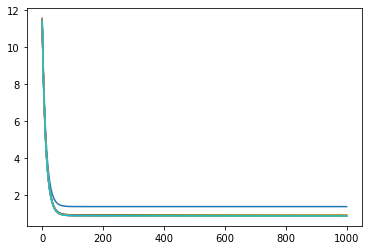

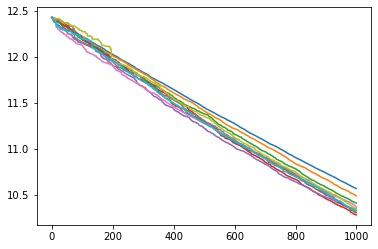

In [316]:
X = generate_feature_matrix(X_train, 9)
(X, mean_norm, std_norm) = normalize_train(X)
training_error_gradient, W_gradient = training_polynomial_regression(Y_train, X, gradient_descent)
training_error_stochastic, W_stochastic = training_polynomial_regression(Y_train, X, stochastic_descent)

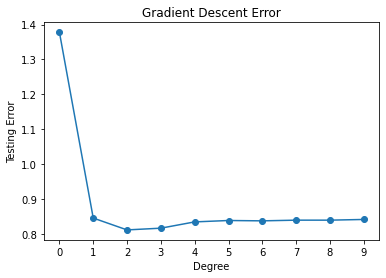

In [317]:
X = generate_feature_matrix(X_test, 9)
X = normalize_test(X, mean_norm, std_norm)

W = [i.reshape([len(i), 1]) for i in W_gradient]
testing_error_gradient = testing_polynomial_regression(Y_test, X, W)

rounded_test_error = [float("{:.3f}".format(testing_error_gradient[i][0])) for i in range(10)]

plt.plot([i for i in range(10)], rounded_test_error, marker = 'o')
plt.xticks([i for i  in range(10)])
plt.xlabel("Degree")
plt.ylabel("Testing Error")
plt.title("Gradient Descent Error")
plt.show()

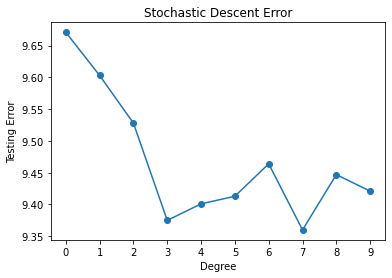

In [318]:
W = [i.reshape([len(i), 1]) for i in W_stochastic]
testing_error_stochastic = testing_polynomial_regression(Y_test, X, W)

rounded_test_error = [float("{:.3f}".format(testing_error_stochastic[i][0])) for i in range(10)]

plt.plot([i for i in range(10)], rounded_test_error, marker = 'o')
plt.xticks([i for i  in range(10)])
plt.xlabel("Degree")
plt.ylabel("Testing Error")
plt.title("Stochastic Descent Error")
plt.show()

In [319]:
degrees = np.array([i for i in range(10)]).reshape([10,1])
polynomial_regression_result = np.concatenate((degrees, training_error_gradient, training_error_stochastic, testing_error_gradient, testing_error_stochastic), axis = 1)

In [320]:
polynomial_regression_table = pd.DataFrame(polynomial_regression_result, columns = ['Degree', 'Training Error (Gradient)', 'Training Error (Stochastic)','Testing Error (Gradient)', 'Testing Error (Stochastic)'])
polynomial_regression_table

,Degree,Training Error (Gradient),Training Error (Stochastic),Testing Error (Gradient),Testing Error (Stochastic)
0,0.0,1.3865,10.5721,1.378097,9.671340
1,1.0,0.9331,10.4939,0.845329,9.602551
2,2.0,0.9062,10.4140,0.811236,9.528194
3,3.0,0.8933,10.2848,0.815870,9.375418
4,4.0,0.8903,10.3358,0.834165,9.401368
5,5.0,0.8891,10.3086,0.837792,9.412918
6,6.0,0.8872,10.3694,0.837333,9.463894
7,7.0,0.8853,10.3138,0.838557,9.359920
8,8.0,0.8840,10.3521,0.839212,9.447137
9,9.0,0.8830,10.3320,0.840830,9.420509


# REGULARIZATION

In [321]:
def regularized_loss_function(Y, X, W, lam, q):

    loss1 = np.sum(1 / (2 * len(X[0])) * ((Y - W.T @ X) ** 2))
    loss2 = np.sum(lam / 2 * (np.abs(W) ** q))

    return loss1 + loss2

In [322]:
def error_function(Y, X, W):
    # print(f"Y: {Y.shape}, X: {X.shape}, W: {W.shape}")
    return np.sum(1 / (2 * len(X[0])) * ((Y - W.T @ X) ** 2))

In [323]:
# l = lambda
def regularized_gradient_descent(Y, X, W, q, alpha, l, iterations):
    N = X.shape[1]
    cost = np.zeros(iterations)
    # print(f"X: {X.shape}, N: {N}, Y: {Y.shape}, W: {W.shape}")
    for i in range(iterations):

        W = W - (alpha) * (((-1 / N) * (X @ (Y - W.T @ X).T)) + ((l / 2) * q * (np.abs(W) ** (q - 1))))
        cost[i] = regularized_loss_function(Y, X, W, l, q)

    return W, cost

In [324]:
X = np.concatenate((np.ones([1, len(X_train[0])]), X_train), axis = 0)
Y = Y_train

X_test = np.concatenate((np.ones([1, len(X_test[0])]), X_test), axis = 0)

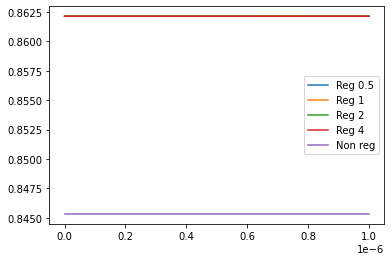

In [325]:
q_vec = [0.5, 1, 2, 4]
lam_vec = np.linspace(1e-10, 1e-6, 20)
alpha = 0.01
iterations = 1000

fig, ax = plt.subplots(1, 1)
for i in range(4):
    q = q_vec[i]
    cost_vec_reg = []
    for l in lam_vec:
        W = np.ones([3, 1])
        W, cost = regularized_gradient_descent(Y, X, W, q, alpha, l, iterations)
        cost_vec_reg.append(error_function(Y_test, X_test, W))
    ax.plot(lam_vec, cost_vec_reg, label=f"Reg {q}")

ax.plot(lam_vec, np.ones(len(lam_vec)) * testing_error_gradient[1][0], label=f"Non reg")

ax.legend()

plt.show()

In [326]:
def predict(x1, x2, degree):
    X = []
    for i in range(degree+1):
        for j in range(i+1):
            k = i - j
            X.append(x1 ** j * x2 ** k)
    X = np.array(X).reshape(-1, 1)
    d = X.shape[0]
    X = (X - mean_norm[:d]) / std_norm[:d]
    return W_gradient[degree] @ X

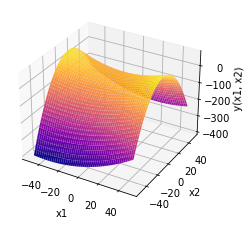

In [339]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

x1 = np.arange(-50, 50, 0.25)
x2 = np.arange(-50, 50, 0.25)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        x1 = X1[i][j]
        x2 = X2[i][j]
        Z[i][j] = predict(x1, x2, 2)


surf = ax.plot_surface(X1, X2, Z, cmap=cm.plasma)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y(x1, x2)")
# fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()